In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
from bci_plot.gen_data.robot import process_logs
from bci_plot.metadata import robot_sessions
from bci_plot.metadata import robot_random

In [3]:
session = 'exp_2024-03-18_12-59-19'

In [4]:
blocks = [
    'exp_2024-03-18_12-34-06.log', # passthrough, 6 pick/place, not affected by bug. not complete ~~
    'exp_2024-03-18_12-44-36.log', # passthrough, 5 pick/place, affected by max_goal bug ~~
    'exp_2024-03-18_13-00-03.log', # passthrough, first half is affected by bug, best sequence ~200000 and on.   ~~
]

In [5]:
logs_all = {}
for block in blocks:
    logs = process_logs.process_logs(f'/data/raspy/robot/{session}/robot_logs/{block}') # passthrough
    logs_all[block] = logs

exp_2024-03-18_12-34-06.log
start [   111    118    122    132    138    140    143    146    155    159
    161    163    165    168    171    174    176    178    182    186
    189    191    193    196    199    202    208    211    214    218
    223    230    235    238    246    253    261    273    283    298
    318    351    410  26824  62089  62094  62104  62107  62110  66579
  66977  66987  87592  87594  87597  87609  87619  87627  87640  87642
 141613 216401 226512 226526 228608 230350 230432 230439 230444 230456
 230458 230460 230462 230465 230469 230476 230478 230480 230483 230486
 230488 230490 230493 230496 230499 230503 230505 230507 230511 230513
 230517 230522 230525 230529 230533 230538 230542 230546 230553 230561
 230567 230575 230588 230601 230616 230638 230669 230733]
stop [   110    117    121    131    137    139    142    144    153    158
    160    162    164    167    170    172    175    177    179    183
    187    190    192    194    197    200    203  

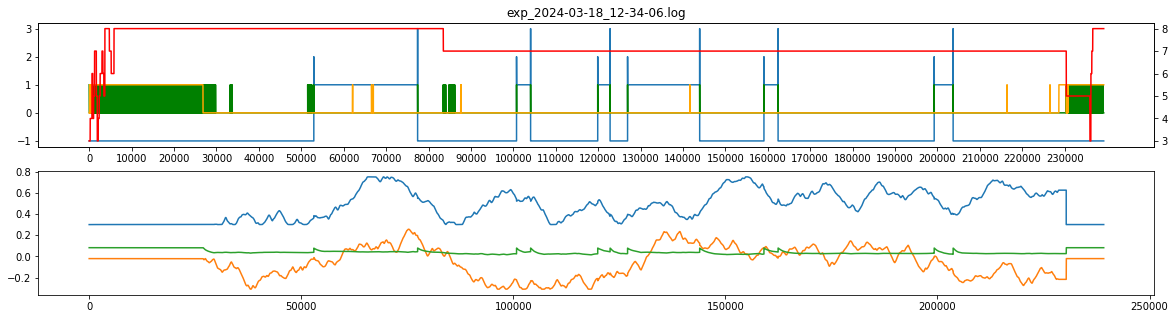

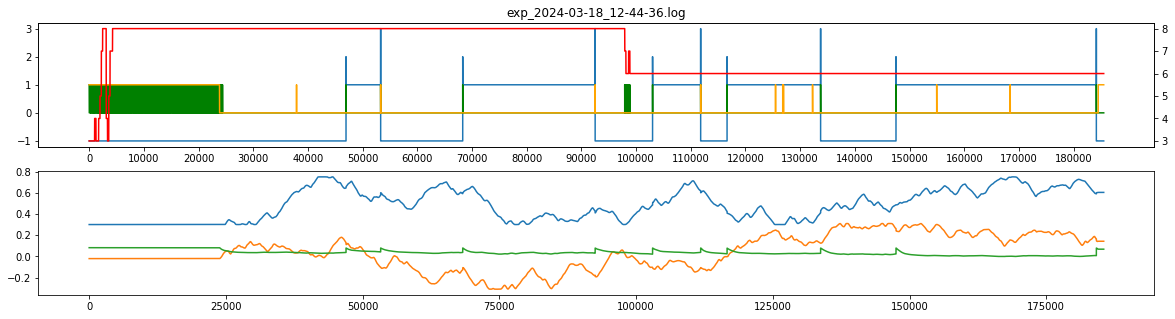

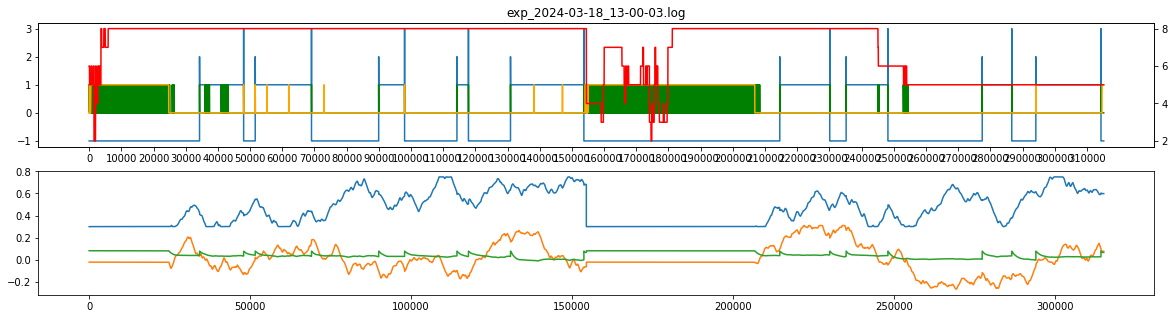

In [7]:
for block in blocks:
    logs = logs_all[block]
    plt.figure(figsize=(20, 5))
    plt.subplot(2, 1, 1)
    plt.plot(logs['gripper'])
    tmp = np.zeros(len(logs['gripper']))
    tmp[logs['all_objs_idx']] = 1
    plt.plot(tmp, 'g')
    
    is_quasi_stationary = np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) < 5e-7
    print(block)
    print('start', np.nonzero((is_quasi_stationary[1:None]==0)*(is_quasi_stationary[0:-1]==1))[0]+2)
    print('stop', np.nonzero((is_quasi_stationary[1:None]==1)*(is_quasi_stationary[0:-1]==0))[0]+2)
    print('reset or grip', np.nonzero(np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) > 0.001)[0]+1)
    plt.plot(is_quasi_stationary, color='orange')
    _ = plt.xticks(np.arange(0, len(is_quasi_stationary), 10000))
    
    plt.gca().twinx()
    plt.plot(logs['all_objs_len'], 'r')
    plt.title(f'{block}')
    
    plt.subplot(2, 1, 2)
    plt.plot(logs['xyz'])
    #break

In [8]:
session = 'exp_2024-05-01_12-21-58'

In [9]:
blocks = [
    'exp_2024-05-01_12-25-05.log', # passthrough, 6 pick/place, not affected by bug. not complete ~~
    'exp_2024-05-01_12-35-34.log', # passthrough, 5 pick/place, affected by max_goal bug ~~
    'exp_2024-05-01_12-45-59.log', # passthrough, first half is affected by bug, best sequence ~200000 and on.   ~~
]

In [10]:
logs_all = {}
for block in blocks:
    logs = process_logs.process_logs(f'/data/raspy/robot/{session}/robot_logs/{block}') # passthrough
    logs_all[block] = logs

exp_2024-05-01_12-25-05.log
start [     2     94    110    114    119    124    127    129    131    133
    136    138    140    142    145    147    149    152    155    157
    160    163    166    171    174    178    184    190    198    204
    212    224    236    254    281    337  33086 117227 117230 117232
 117247 216898]
stop [    93    109    113    118    123    126    128    130    132    135
    137    139    141    143    146    148    150    153    156    158
    161    164    167    172    175    179    185    191    199    205
    213    225    237    255    282    338 117226 117229 117231 117246
 216897 217170]
reset or grip [ 44522  85482 106267 153715 158858 161925 178144 190280 206326 216894]
exp_2024-05-01_12-35-34.log
start [ 25611  28936  51795  61334 107767 227376]
stop [ 28935  51794  61333 107766 227372 227377]
reset or grip [ 48345  51795  58236  61331 107765 110926 138893 150536 185440 205984
 216678 227158]
exp_2024-05-01_12-45-59.log
start [    20  2752

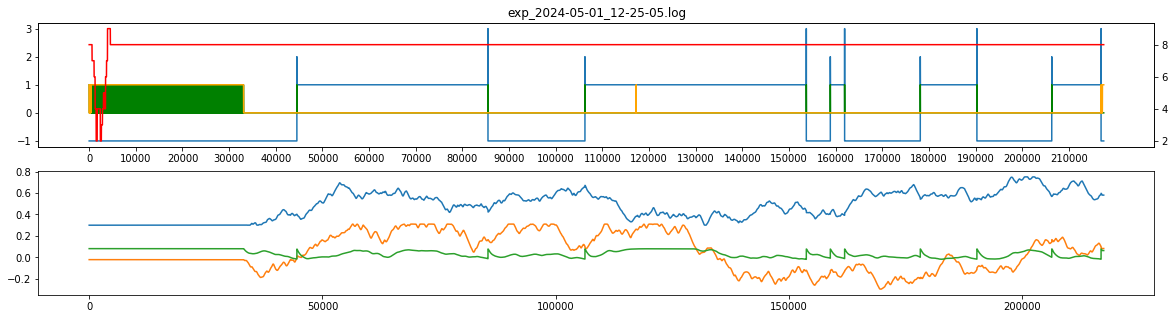

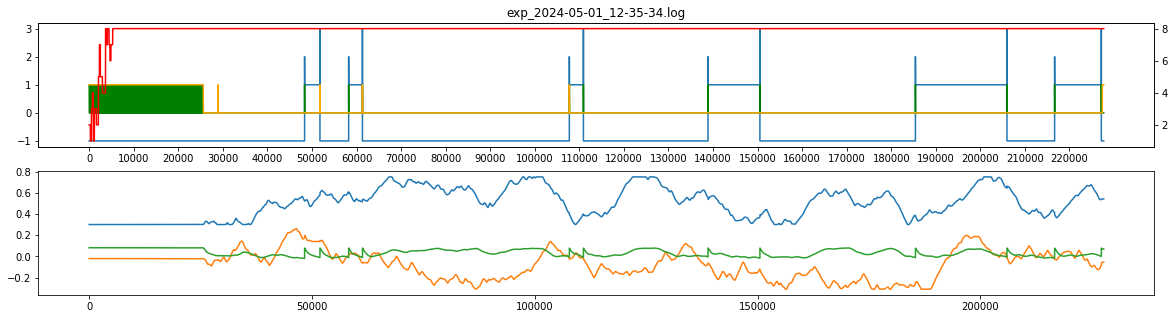

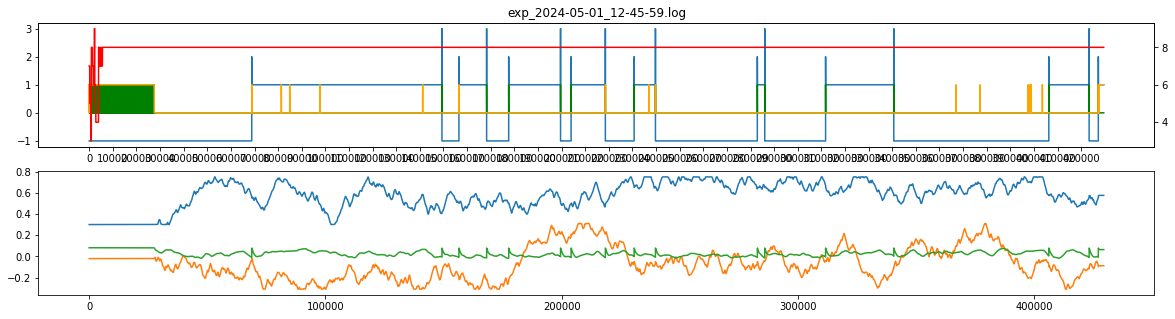

In [11]:
for block in blocks:
    logs = logs_all[block]
    plt.figure(figsize=(20, 5))
    plt.subplot(2, 1, 1)
    plt.plot(logs['gripper'])
    tmp = np.zeros(len(logs['gripper']))
    tmp[logs['all_objs_idx']] = 1
    plt.plot(tmp, 'g')
    
    is_quasi_stationary = np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) < 5e-7
    print(block)
    print('start', np.nonzero((is_quasi_stationary[1:None]==0)*(is_quasi_stationary[0:-1]==1))[0]+2)
    print('stop', np.nonzero((is_quasi_stationary[1:None]==1)*(is_quasi_stationary[0:-1]==0))[0]+2)
    print('reset or grip', np.nonzero(np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) > 0.001)[0]+1)
    plt.plot(is_quasi_stationary, color='orange')
    _ = plt.xticks(np.arange(0, len(is_quasi_stationary), 10000))
    
    plt.gca().twinx()
    plt.plot(logs['all_objs_len'], 'r')
    plt.title(f'{block}')
    
    plt.subplot(2, 1, 2)
    plt.plot(logs['xyz'])
    #break

In [44]:
start_stop = {
    'exp_2024-05-01_12-25-05.log': (33086, 216896),
    'exp_2024-05-01_12-35-34.log': (25611, 227160),
    'exp_2024-05-01_12-45-59.log': (27524, 427245),
}

exp_2024-05-01_12-25-05.log
start [     2     94    110    114    119    124    127    129    131    133
    136    138    140    142    145    147    149    152    155    157
    160    163    166    171    174    178    184    190    198    204
    212    224    236    254    281    337  33086 117227 117230 117232
 117247 216898]
stop [    93    109    113    118    123    126    128    130    132    135
    137    139    141    143    146    148    150    153    156    158
    161    164    167    172    175    179    185    191    199    205
    213    225    237    255    282    338 117226 117229 117231 117246
 216897 217170]
reset or grip [ 44522  85482 106267 153715 158858 161925 178144 190280 206326 216894]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
 -1 -1]
exp_2024-05-01_12-35-34.log
start [ 25611  28936  51795  61334 107767 227376]
stop [ 28935  51794  61333 107766 227372 22

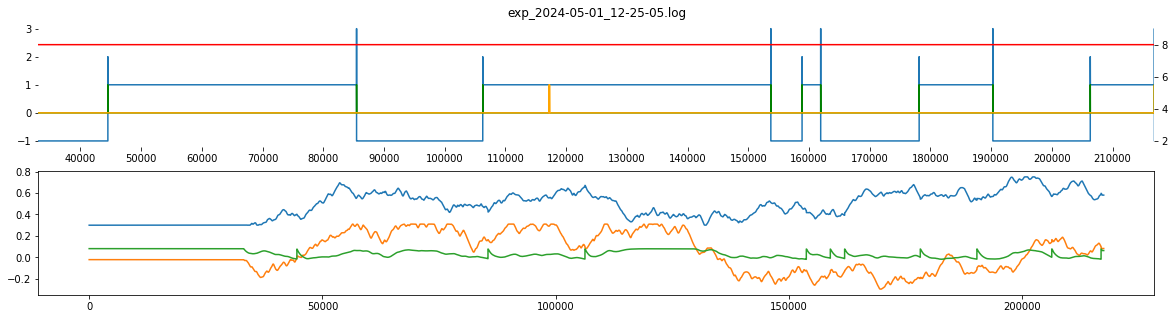

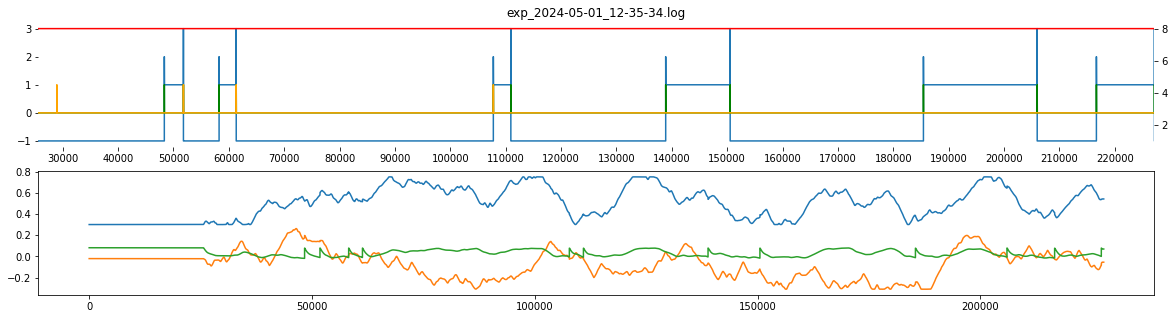

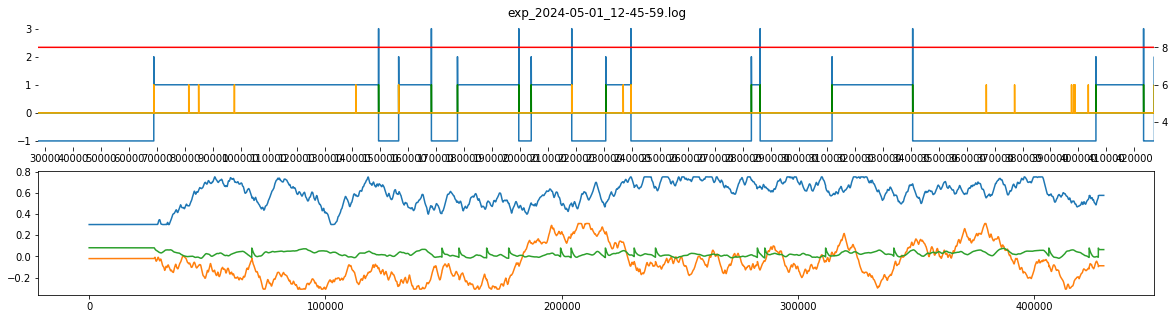

In [45]:
for block in blocks:
    logs = logs_all[block]
    plt.figure(figsize=(20, 5))
    plt.subplot(2, 1, 1)
    plt.plot(logs['gripper'])
    tmp = np.zeros(len(logs['gripper']))
    tmp[logs['all_objs_idx']] = 1
    plt.plot(tmp, 'g')
    
    is_quasi_stationary = np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) < 5e-7
    print(block)
    print('start', np.nonzero((is_quasi_stationary[1:None]==0)*(is_quasi_stationary[0:-1]==1))[0]+2)
    print('stop', np.nonzero((is_quasi_stationary[1:None]==1)*(is_quasi_stationary[0:-1]==0))[0]+2)
    print('reset or grip', np.nonzero(np.linalg.norm(np.diff(logs['xyz'], axis=0), axis=-1) > 0.001)[0]+1)
    plt.plot(is_quasi_stationary, color='orange')
    _ = plt.xticks(np.arange(0, len(is_quasi_stationary), 10000))
    
    plt.xlim(start_stop[block])
    plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    plt.gca().twinx()
    plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    plt.plot(logs['all_objs_len'], 'r')
    plt.title(f'{block}')
    
    plt.subplot(2, 1, 2)
    plt.plot(logs['xyz'])
    #break
    
    
    print(logs['gripper'][start_stop[block][1]-50:start_stop[block][1]])

In [ ]:
(33086, 117227)
(25611, 227372)
(27524, 427245)